<a href="https://colab.research.google.com/github/nalrob/Aprendizaje-Automatico/blob/main/CT%2BRTCD_H3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [10]:
!pip install eli5 shap pdpbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.7/572.7 kB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 11.3 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=04c39227b2996740a7959655d581bfc16e379b54ab9a69752c3ab382882e

In [163]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import LogisticRegression
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)


# **Extracting from data source**

In [235]:
from google.colab import files
uploaded= files.upload()

KeyboardInterrupt: 

In [276]:
import zipfile
import io
data=zipfile.ZipFile(io.BytesIO(uploaded['cardiotox.zip']),'r')
data.extractall()

In [277]:
file_list = data.namelist()
print("Archivos extraídos:", file_list)

Archivos extraídos: ['TDI_images_preprocessing_algorithm.R', 'TDIimage_automatic.png', 'TDIimage_manual.png', 'IMAGES.rar', 'README.txt', 'BC_cardiotox_clinical_and_functional_variables.csv', 'BC_cardiotox_clinical_variables.csv', 'BC_cardiotox_functional_variable.csv']


In [278]:
### SOLO historial clinico

import pandas as pd

def import_data(from_file):
    results = []
    titles = []

    try:
        with open(from_file, 'r') as archivo:
            lineas = archivo.readlines()

            # Process the first line to extract titles
            titles = lineas[0].strip().split(';')

            # Process the missing lines
            for linea in lineas[1:]:
                values = linea.strip().split(';')
                result_iteration = process_values(values)
                results.append(result_iteration)

    except FileNotFoundError:
        print(f"Error: El archivo {from_file} no fue encontrado.")
        return None
    except Exception as e:
        print(f"Error al leer el archivo: {str(e)}")
        return None

    # Create a dataframe w results & add titles
    df_var = pd.DataFrame(results, columns=titles[:27])
    return df_var

def process_values(values):
    # Devolver los valores de las 27 primeras columnas
    return values[:27]

file = '/content/BC_cardiotox_clinical_and_functional_variables.csv'
df = import_data(file)
df

,heart_rate,age,weight,height,CTRCD,time,heart_rhythm,LVEF,PWT,LAd,...,smoker,exsmoker,ACprev,antiHER2prev,RTprev,CIprev,ICMprev,ARRprev,VALVprev,cxvalv
0,103,58,58,151,1,619,0,"60,24096386","0,8","3,8",...,,,,,,,,,,
1,94,75,66,150,0,1884,0,"66,27403031","1,093170204","3,463273568",...,0,0,0,0,0,0,0,0,0,0
2,96,53,55,149,0,1830,0,70,"0,661084178","2,894431584",...,,,,,,,,,,
3,58,67,50,"162,5",1,820,0,"56,54077998","0,798487967","3,439739698",...,,,,,,,,,,
4,76,59,70,159,0,2276,0,"67,21281916","0,73427974","2,698600354",...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,69,40,58,"158,5",0,392,0,"67,34021706","0,849898211","2,604906554",...,0,0,0,0,0,0,0,0,0,0
527,77,42,102,163,0,538,0,"73,55165001","1,020905154","2,263032997",...,0,0,0,0,0,0,0,0,0,0
528,80,45,63,171,0,2027,0,"74,78422784","0,808679193","3,376373508",...,0,0,0,0,0,0,0,0,0,0
529,91,53,69,150,0,679,0,"60,81284513","1,078942241","2,571179447",...,,,,,,,,,,


# **Preprocessing**

In [279]:
df = df.apply(pd.to_numeric, errors='coerce')
df

,heart_rate,age,weight,height,CTRCD,time,heart_rhythm,LVEF,PWT,LAd,...,smoker,exsmoker,ACprev,antiHER2prev,RTprev,CIprev,ICMprev,ARRprev,VALVprev,cxvalv
0,103,58,58.0,151.0,1,619,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,94,75,66.0,150.0,0,1884,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96,53,55.0,149.0,0,1830,0.0,70.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,58,67,50.0,NaN,1,820,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76,59,70.0,159.0,0,2276,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,69,40,58.0,NaN,0,392,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527,77,42,102.0,163.0,0,538,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
528,80,45,63.0,171.0,0,2027,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
529,91,53,69.0,150.0,0,679,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
df.fillna(0, inplace=True)

In [281]:
data = df[df['AC'] == 1]

In [282]:
data = df.drop(columns=['AC'])
data

,heart_rate,age,weight,height,CTRCD,time,heart_rhythm,LVEF,PWT,LAd,...,smoker,exsmoker,ACprev,antiHER2prev,RTprev,CIprev,ICMprev,ARRprev,VALVprev,cxvalv
0,103,58,58.0,151.0,1,619,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,94,75,66.0,150.0,0,1884,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96,53,55.0,149.0,0,1830,0.0,70.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,58,67,50.0,0.0,1,820,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,76,59,70.0,159.0,0,2276,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,69,40,58.0,0.0,0,392,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527,77,42,102.0,163.0,0,538,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
528,80,45,63.0,171.0,0,2027,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
529,91,53,69.0,150.0,0,679,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [283]:
X = data.drop(columns=['CTRCD'])
y = data['CTRCD']

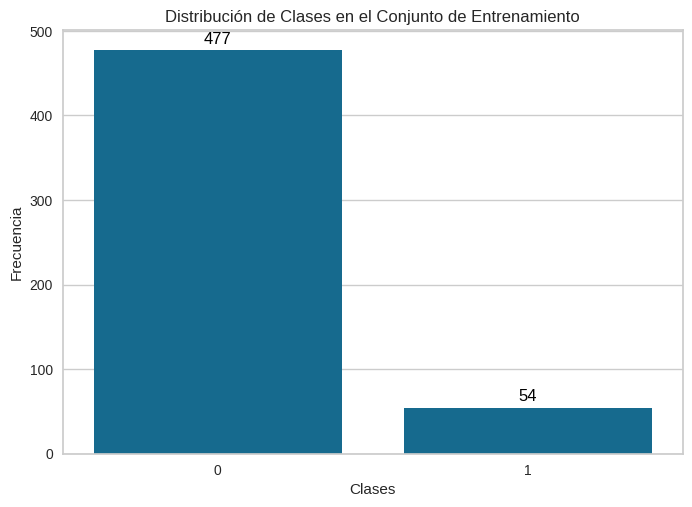

In [284]:
ax = sns.countplot(x=y)
plt.title('Distribución de Clases en el Conjunto de Entrenamiento')
plt.xlabel('Clases')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


Imputation

In [285]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['CTRCD'] = y_resampled

In [286]:
print(f"\nTamaño del conjunto de datos original: {data.shape}")
print(f"Tamaño del conjunto de datos resampleado: {resampled_data.shape}")


Tamaño del conjunto de datos original: (531, 26)
Tamaño del conjunto de datos resampleado: (954, 26)


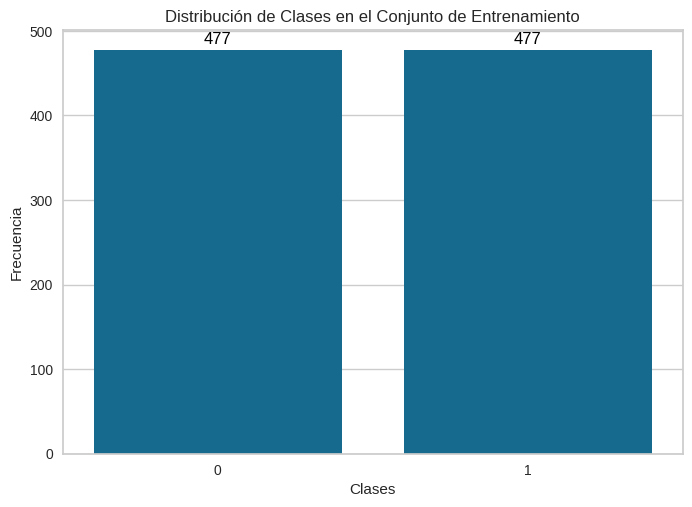

In [287]:
ax = sns.countplot(x=y_resampled)
plt.title('Distribución de Clases en el Conjunto de Entrenamiento')
plt.xlabel('Clases')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()



Splitting data with train_test_split

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [74]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Estandarize data

In [289]:
# Definir las listas de características para escalado y one-hot encoding
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVDd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev',
       'RTprev', 'CIprev', 'ICMprev', 'ARRprev', 'VALVprev', 'cxvalv', 'heart_rhythm']

# Modificar el ColumnTransformer para incluir la imputación
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Añadir paso de imputación
            ('scaler', StandardScaler())
        ]), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)  # Manejar categorías desconocidas
    ])

In [290]:
X_train.dtypes

heart_rate        int64
age               int64
weight          float64
height          float64
time              int64
heart_rhythm    float64
LVEF            float64
PWT             float64
LAd             float64
LVDd            float64
LVSd            float64
antiHER2        float64
HTA             float64
DL              float64
DM              float64
smoker          float64
exsmoker        float64
ACprev          float64
antiHER2prev    float64
RTprev          float64
CIprev          float64
ICMprev         float64
ARRprev         float64
VALVprev        float64
cxvalv          float64
dtype: object

In [291]:
feature_names = ['heart_rate', 'age', 'weight', 'height', 'time', 'heart_rhythm', 'LVEF',
                 'PWT', 'LAd', 'LVDd', 'LVSd', 'antiHER2', 'HTA', 'DL', 'DM',
                 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev', 'RTprev', 'CIprev',
                 'ICMprev', 'ARRprev', 'VALVprev', 'cxvalv']

In [292]:
X_df = pd.DataFrame(X, columns=feature_names)

ALL

In [293]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [294]:
preprocessor = StandardScaler()

In [321]:
# Pipeline para Regresión Logística
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Pipeline para Random Forest
#pipeline_rf = Pipeline([
#    ('preprocessor', preprocessor),
#    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
#])

# Pipeline para Support Vector Classifier
pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

# Pipeline para Árbol de Decisión
#pipeline_dt = Pipeline([
#    ('preprocessor', preprocessor),
#    ('classifier', DecisionTreeClassifier(random_state=42))
#])

# Pipeline para K-Nearest Neighbors
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Pipeline para Naive Bayes
pipeline_nb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

#pipelines = [pipeline_lr, pipeline_rf, pipeline_svc, pipeline_dt, pipeline_knn, pipeline_nb]
#pipeline_names = ['Logistic Regression', 'Random Forest', 'SVC', 'Decision Tree', 'KNN', 'Naive Bayes']

pipelines = [pipeline_lr, pipeline_svc, pipeline_knn, pipeline_nb]
pipeline_names = ['Logistic Regression', 'SVC', 'KNN', 'Naive Bayes']



In [322]:
def evaluate_model(pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)

    y_pred_test = pipeline.predict(X_test)
    y_pred_prob_test = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['classifier'], "predict_proba") else None

    y_pred_train = pipeline.predict(X_train)
    y_pred_prob_train = pipeline.predict_proba(X_train)[:, 1] if hasattr(pipeline.named_steps['classifier'], "predict_proba") else None

    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test, y_pred_prob_test) if y_pred_prob_test is not None else None

    accuracy_train = accuracy_score(y_train, y_pred_train)

    metrics = {
        'Test Accuracy': accuracy_test,
        'Train Accuracy': accuracy_train,
        'Precision': precision_test,
        'Recall': recall_test,
        'F1 Score': f1_test,
        'ROC AUC': roc_auc_test
    }

    return metrics

results = {name: evaluate_model(pipeline, X_train, y_train, X_test, y_test) for name, pipeline in zip(pipeline_names, pipelines)}


In [323]:
for name, pipeline in zip(pipeline_names, pipelines):
    print(f"Evaluating {name}...")
    metrics = evaluate_model(pipeline, X_train, y_train, X_test, y_test)

    print(f"\n{name} Metrics:")
    for metric, value in metrics.items():
        if metric == 'Confusion Matrix':
            print(f"{metric}:\n{value}\n")
        elif metric == 'Classification Report':
            print(f"{metric}:\n{value}")
        else:
            print(f"{metric}: {value:.4f}")


Evaluating Logistic Regression...

Logistic Regression Metrics:
Test Accuracy: 0.7539
Train Accuracy: 0.7772
Precision: 0.7292
Recall: 0.7692
F1 Score: 0.7487
ROC AUC: 0.8335
Evaluating SVC...

SVC Metrics:
Test Accuracy: 0.8691
Train Accuracy: 0.9096
Precision: 0.8438
Recall: 0.8901
F1 Score: 0.8663
ROC AUC: 0.9396
Evaluating KNN...

KNN Metrics:
Test Accuracy: 0.8534
Train Accuracy: 0.9069
Precision: 0.7838
Recall: 0.9560
F1 Score: 0.8614
ROC AUC: 0.9283
Evaluating Naive Bayes...

Naive Bayes Metrics:
Test Accuracy: 0.7173
Train Accuracy: 0.7182
Precision: 0.7681
Recall: 0.5824
F1 Score: 0.6625
ROC AUC: 0.7941


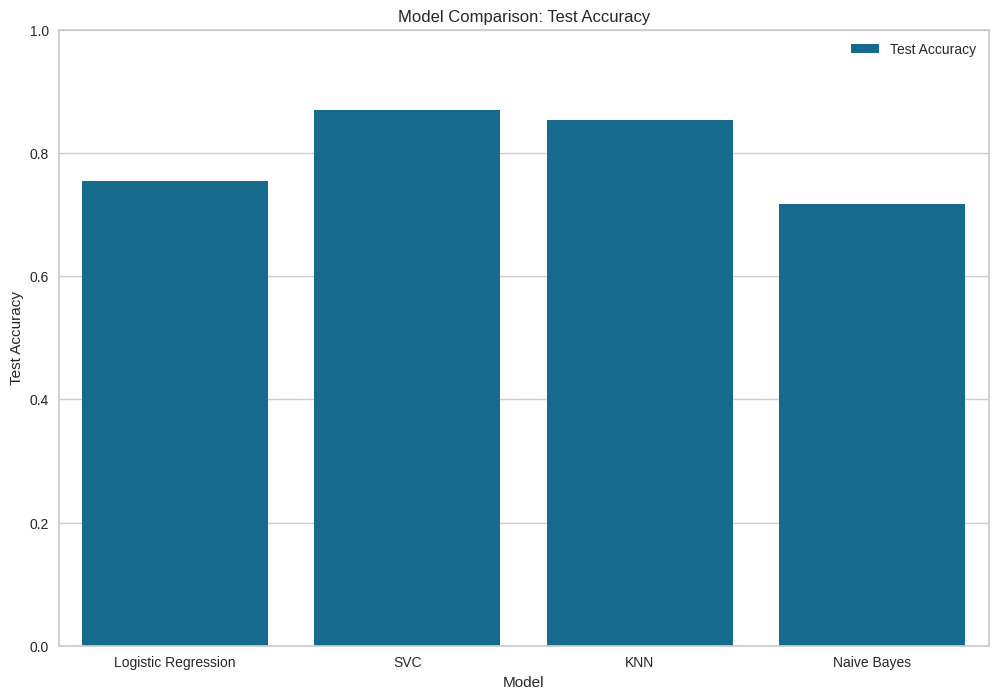

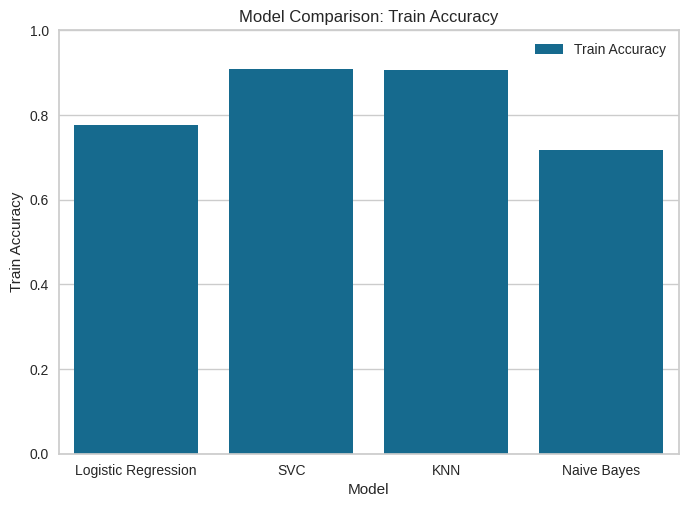

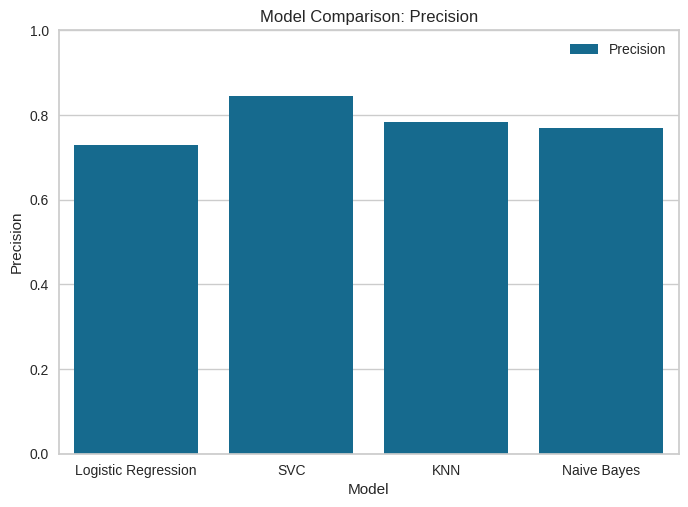

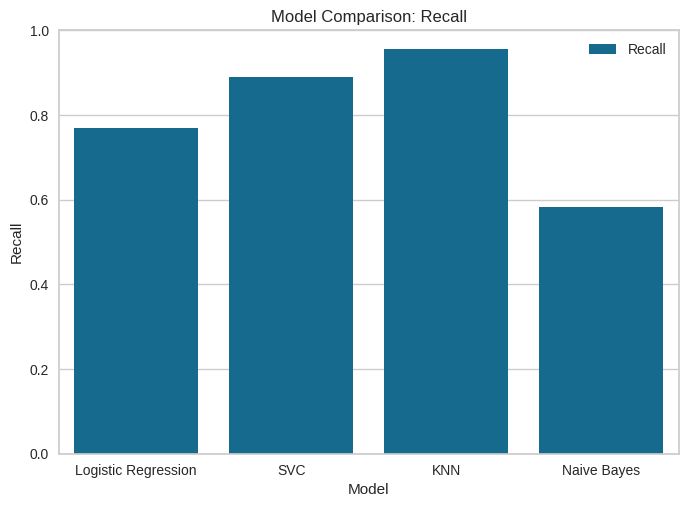

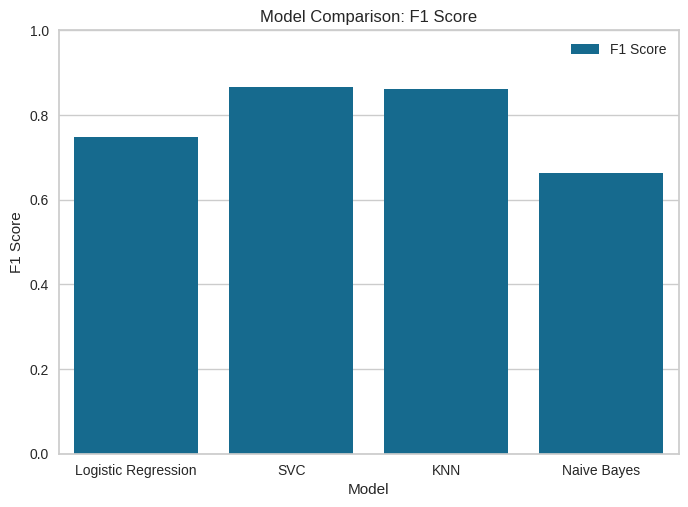

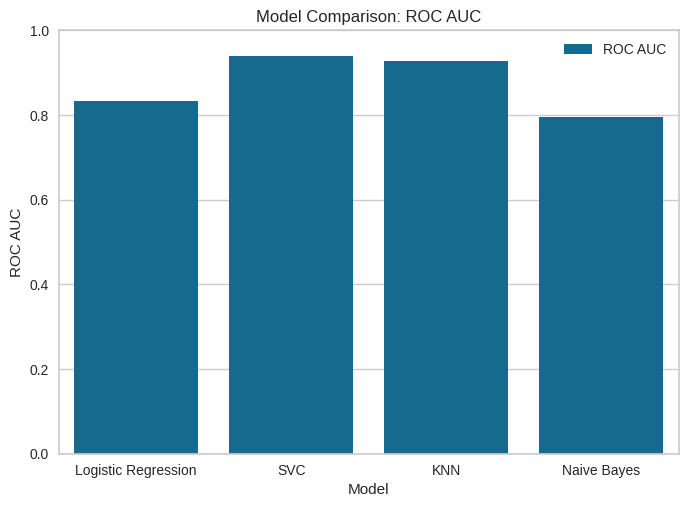

In [332]:
metrics_names = ['Test Accuracy', 'Train Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# Crear un DataFrame para las métricas
import pandas as pd

metrics_df = pd.DataFrame(results).T
metrics_df = metrics_df[metrics_names]

# Graficar las métricas
plt.figure(figsize=(12, 8))

for metric in metrics_names:
    sns.barplot(x=metrics_df.index, y=metrics_df[metric], label=metric)
    plt.title(f'Model Comparison: {metric}')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.show()


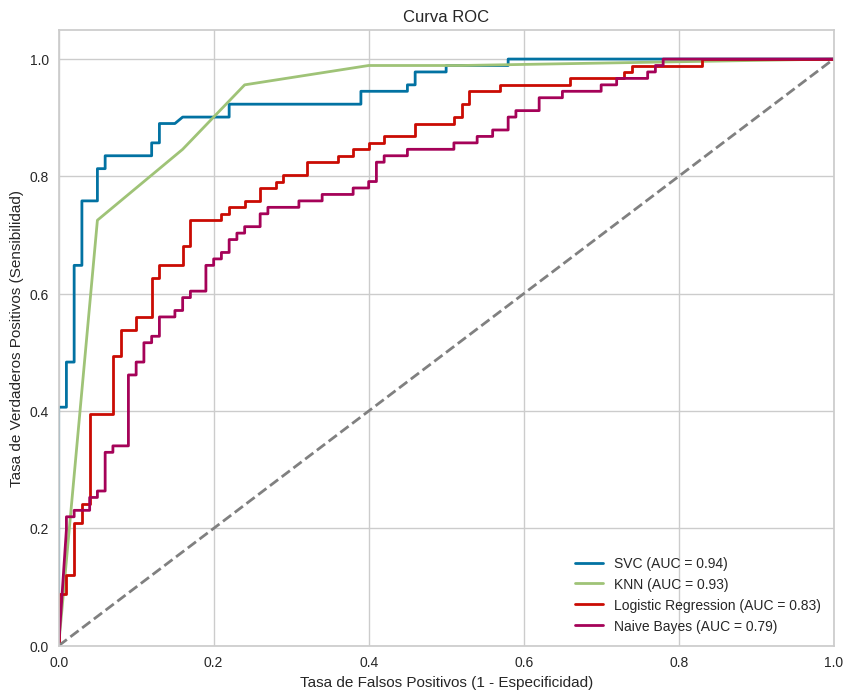

In [356]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Definir pipelines para cada modelo
pipelines = {
    'SVC': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC(random_state=42, probability=True))
    ]),
    'KNN': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]),
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    'Naive Bayes': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GaussianNB())
    ])
}

# Codificar etiquetas
label = LabelEncoder()
y_train_label = label.fit_transform(y_train)
y_test_label = label.transform(y_test)

plt.figure(figsize=(10, 8))

# Evaluar cada modelo y trazar su curva ROC
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train_label)
    y_pred = pipeline.predict(X_test)

    if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
        y_prob = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_prob = pipeline.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test_label, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


# **Best Model**

In [333]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

In [334]:
label = LabelEncoder()
y_train_label = label.fit_transform(y_train)
y_test_label = label.transform(y_test)


In [337]:
pipeline.fit(X_train, y_train_label)

y_pred = pipeline.predict(X_test)

if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
    y_prob = pipeline.predict_proba(X_test)[:, 1]
else:
    y_prob = None


In [338]:
accuracy_train = accuracy_score(y_train_label, pipeline.predict(X_train))
accuracy_test = accuracy_score(y_test_label, y_pred)

print(f"Train Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.90956749672346
Test Accuracy: 0.8691099476439791


Importance by variable

In [340]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[85 15]
 [10 81]]


In [341]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       100
           1       0.84      0.89      0.87        91

    accuracy                           0.87       191
   macro avg       0.87      0.87      0.87       191
weighted avg       0.87      0.87      0.87       191



In [342]:
perm = PermutationImportance(pipeline, random_state=1).fit(X_test, y_test_label)
eli5.show_weights(perm, feature_names=feature_names, top=X_test.shape[1])


Weight,Feature
0.0534 ± 0.0260,ACprev
0.0471 ± 0.0148,antiHER2prev
0.0429 ± 0.0405,age
0.0419 ± 0.0066,LAd
0.0335 ± 0.0084,VALVprev
0.0283 ± 0.0170,ARRprev
0.0272 ± 0.0078,heart_rhythm
0.0262 ± 0.0148,cxvalv
0.0251 ± 0.0103,DL
0.0241 ± 0.0107,LVEF


Charts and visualizations

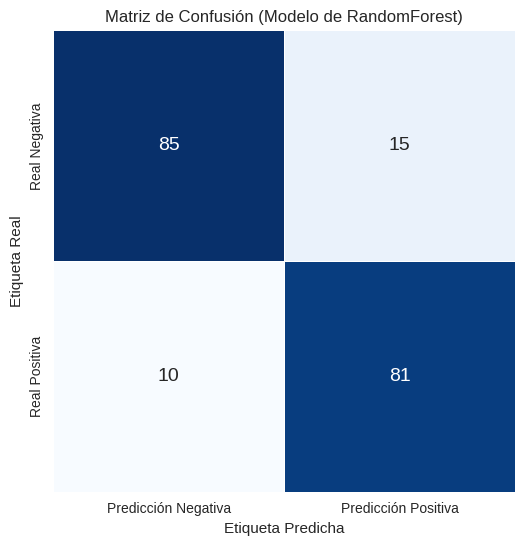

In [343]:
# 1. Matriz de Confusión
cm = confusion_matrix(y_test_label, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, square=True,
            xticklabels=['Predicción Negativa', 'Predicción Positiva'],
            yticklabels=['Real Negativa', 'Real Positiva'])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión (Modelo de RandomForest)')
plt.show()

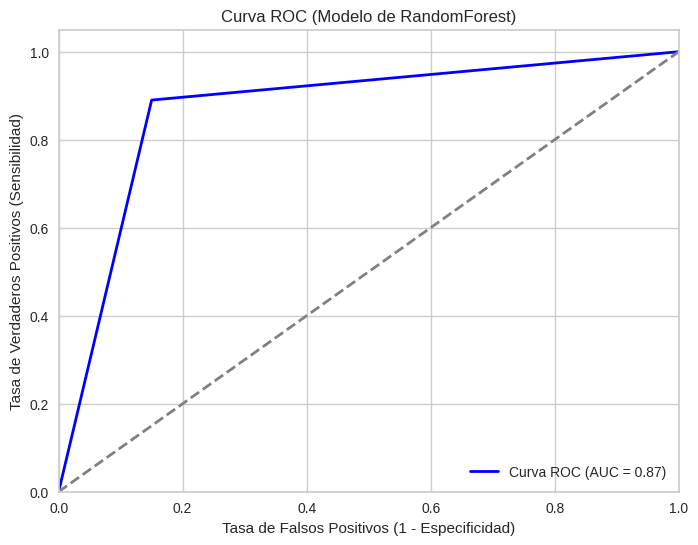

In [348]:
# 2. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test_label, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC (Modelo de RandomForest)')
plt.legend(loc="lower right")
plt.show()


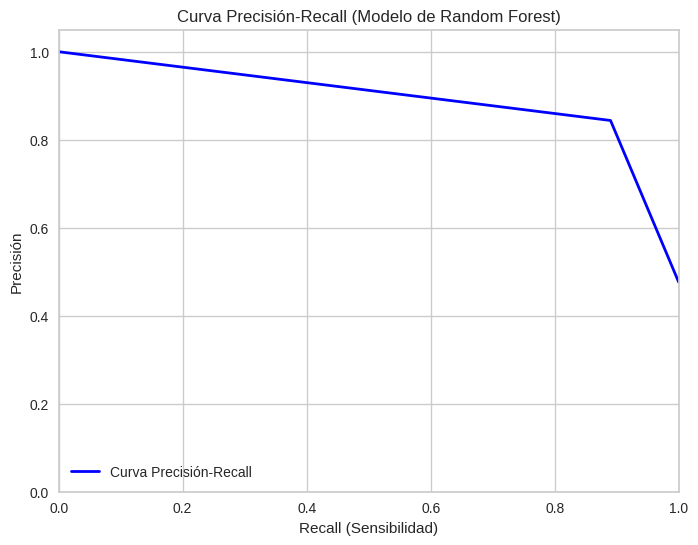

In [349]:
# 3. Curva Precisión-Recall
precision, recall, _ = precision_recall_curve(y_test_label, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Curva Precisión-Recall')
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precisión')
plt.title('Curva Precisión-Recall (Modelo de Random Forest)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# **Logistic Regression**

In [226]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Cambiar a LogisticRegression
])

In [227]:
# Codificar las etiquetas
label = LabelEncoder()
y_train_label = label.fit_transform(y_train)
y_test_label = label.transform(y_test)

# Entrenar el modelo
pipeline.fit(X_train, y_train_label)

# Obtener predicciones
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Calcular la precisión (accuracy) en entrenamiento y prueba
accuracy_train = accuracy_score(y_train_label, pipeline.predict(X_train))
accuracy_test = accuracy_score(y_test_label, y_pred)

In [228]:
print(f'Accuracy en entrenamiento: {accuracy_train:.4f}')
print(f'Accuracy en prueba: {accuracy_test:.4f}')

Accuracy en entrenamiento: 0.9191
Accuracy en prueba: 0.8625


In [229]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[135   5]
 [ 17   3]]


In [230]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       140
           1       0.38      0.15      0.21        20

    accuracy                           0.86       160
   macro avg       0.63      0.56      0.57       160
weighted avg       0.82      0.86      0.84       160



Importance by variable

In [231]:
perm = PermutationImportance(pipeline, random_state=1).fit(X_test, y_test_label)
eli5.show_weights(perm, feature_names=feature_names, top=X_test.shape[1])


Weight,Feature
0.0088 ± 0.0061,DM
0.0088 ± 0.0061,LVDd
0.0075 ± 0.0050,RTprev
0.0075 ± 0.0146,time
0.0063 ± 0.0079,height
0.0050 ± 0.0122,HTA
0.0050 ± 0.0094,PWT
0.0025 ± 0.0061,weight
0.0025 ± 0.0127,antiHER2
0.0013 ± 0.0094,heart_rate


Charts and visualizations

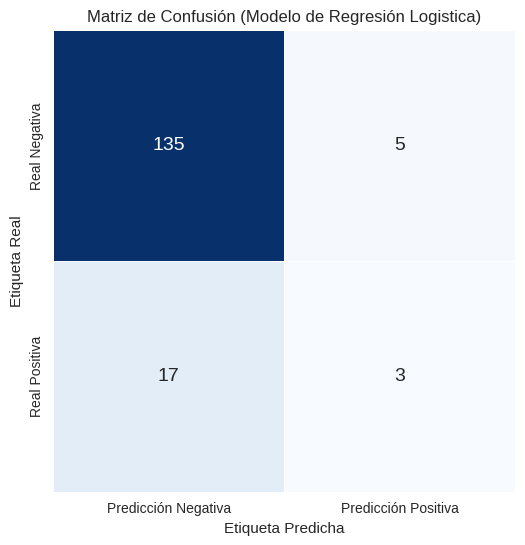

In [232]:
# 1. Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, square=True,
            xticklabels=['Predicción Negativa', 'Predicción Positiva'],
            yticklabels=['Real Negativa', 'Real Positiva'])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión (Modelo de Regresión Logistica)')
plt.show()


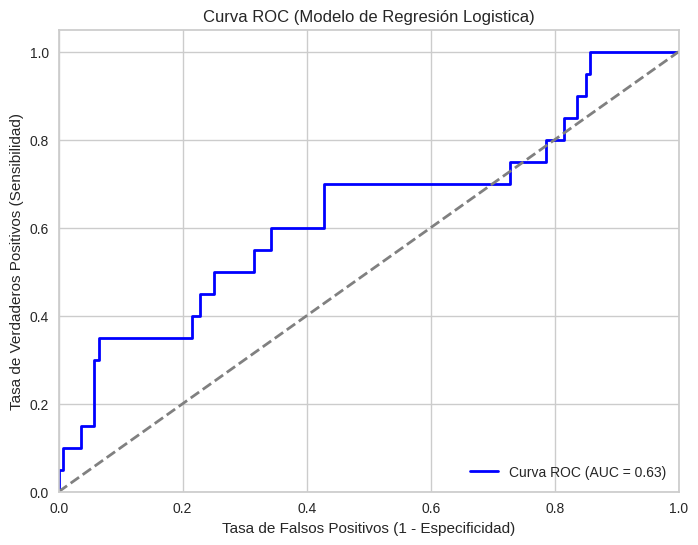

In [233]:
# 2. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC (Modelo de Regresión Logistica)')
plt.legend(loc="lower right")
plt.show()


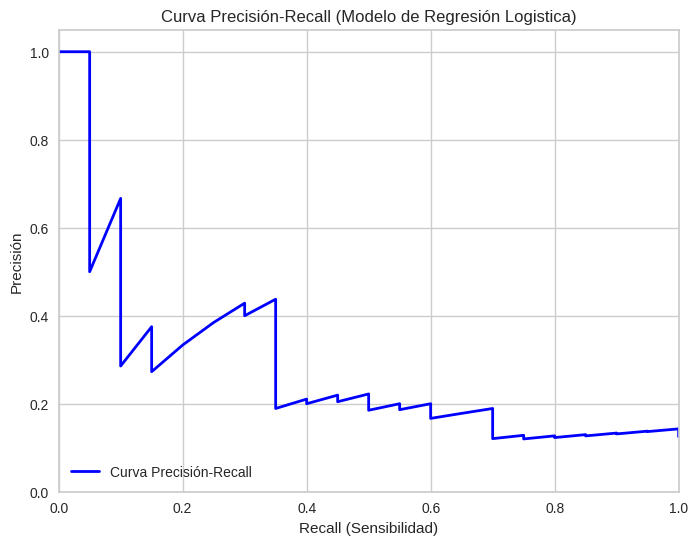

In [234]:
# 3. Curva Precisión-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Curva Precisión-Recall')
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precisión')
plt.title('Curva Precisión-Recall (Modelo de Regresión Logistica)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower left")
plt.grid(True)
plt.show()